**Getting the legal data**



In [2]:
import requests
import json

api_token = 'befe0fc1a66113d7b6021abbc855d08054d58090'
api_endpoint = 'https://www.courtlistener.com/api/rest/v3/opinions/'
headers = {'Authorization': 'Token ' + api_token}

response = requests.get(api_endpoint, headers=headers)

if response.status_code == 200:
    data = response.json()

    # Saving the data to a file.json
    with open('case_citations.json', 'w') as file:
        json.dump(data, file)

    print("Data downloaded successfully.")
else:
    print(f"Error: {response.status_code}")


Data downloaded successfully.


**Getting individual newer cases under Washington State Juridiction**

1.   The dataset is from Court Listener API: https://www.courtlistener.com/api/rest/v3/opinions/
2.   It gives out random cases from the Court Opinions database in the form of JSON files.

In [3]:
import requests
import json

api_token = 'befe0fc1a66113d7b6021abbc855d08054d58090'

#api_endpoint = 'https://www.courtlistener.com/api/rest/v3/opinions/'
"""
Each page consists of around 10 cases - 20 cases.
Pages to be modified as needed ?page = %d.
"""
api_endpoint = 'https://www.courtlistener.com/api/rest/v3/opinions/?page=10'

params = {'jurisdiction': 'washington_state_filter'}

headers = {'Authorization': 'Token ' + api_token}

response = requests.get(api_endpoint, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()

    # Save the data to a file.json
    with open('washington_state_opinions_page10.json', 'w') as file:
        json.dump(data, file)

    print("Data downloaded successfully.")
else:
    print(f"Error: {response.status_code}")


Data downloaded successfully.


**Initial View of the Data**
1. This data has been converted into text format for easier viewing and analysis.



In [7]:
import json
import pandas as pd
with open('out01.json', 'r') as f:
    d1 = json.load(f)


**The snapshot of the case:**



{"count": 9695723, "next": "https://www.courtlistener.com/api/rest/v3/opinions/?jurisdiction=washington_state_filter&page=2", "previous": null, "results": [{"resource_uri": "https://www.courtlistener.com/api/rest/v3/opinions/9925543/", "id": 9925543, "absolute_url": "/opinion/9467705/continental-heritage-insurance-company-agent-pat-kinnard-dba-pat/", "cluster_id": 9467705, "cluster": "https://www.courtlistener.com/api/rest/v3/clusters/9467705/", "author_id": null, "author": null, "joined_by": [], "date_created": "2024-01-21T09:10:57.051914-08:00", "date_modified": "2024-01-21T09:29:37.048004-08:00", "author_str": "", "per_curiam": false, "joined_by_str": "", "type": "010combined", "sha1": "a40cbda74c3600b46a1df9cf729376bc659bee3b", "page_count": 20, "download_url": "https://search.txcourts.gov/RetrieveDocument.aspx?DocId=24528&Index=%5c%5c10%2e20%2e4%2e7%5cTamesIndexes%5ccca%5cOpinion", "local_path": "pdf/2024/01/17/continental_heritage_insurance_company_agent_pat_kinnard_dba_pat.pdf", "plain_text": "               IN THE COURT OF CRIMINAL APPEALS\n                           OF TEXAS\n                                          NO. PD-0018-23\n\n\n          CONTINENTAL HERITAGE INSURANCE COMPANY,\n     AGENT PAT KINNARD, D/B/A PAT KINNARD BAIL BONDS, Appellant\n\n                                                   v.\n\n                                    THE STATE OF TEXAS\n\n                     ON APPELLANT\u2019S MOTION FOR REHEARING\n                    AFTER OPINION ON DISCRETIONARY REVIEW\n                       FROM THE FIFTH COURT OF APPEALS\n                                DALLAS COUNTY\n\n                 KELLER, P.J., delivered the opinion for a unanimous Court.\n\n\n        Are civil filing fees part of the court costs that a bonding company1 must pay if a bond is\n\nforfeited? The answer to that question is complicated. It is \u201cyes,\u201d except when a statute exempts\n\nthe State from liability for a particular filing fee, unless another provision requires a civil defendant\n\nto pay the fee if the State prevails. After our opinion on original submission, Appellant (the surety\n\n\n\n        1\n            Or in some cases, a criminal defendant.\n\f                               CONTINENTAL HERITAGE INSURANCE COMPANY \u2014 2\n\nin this case) filed a motion for rehearing. We grant the motion for rehearing, withdraw our previous\n\nopinion, and substitute this opinion in its place.2 Although one of Appellant\u2019s arguments affects a\n\nportion of our reasoning, our holding remains unchanged.\n\n                                       I. BACKGROUND\n\n                                 A. Bond Forfeiture and Costs\n\n       Darrell David was indicted for unlawful possession of a firearm by a felon. David failed to\n\nappear at a trial setting, and a judgment nisi was entered for the forfeiture of a $10,000 bond.

In [19]:
import json
file_path = 'output_washington_state_opinions_page1.txt'
# Reading the JSON file.json
with open(file_path, 'r') as file:
    data = json.load(file)

first_result_keys = data['results'][0].keys() if 'results' in data and len(data['results']) > 0 else []
print(first_result_keys)


dict_keys(['resource_uri', 'id', 'absolute_url', 'cluster_id', 'cluster', 'author_id', 'author', 'joined_by', 'date_created', 'date_modified', 'author_str', 'per_curiam', 'joined_by_str', 'type', 'sha1', 'page_count', 'download_url', 'local_path', 'plain_text', 'html', 'html_lawbox', 'html_columbia', 'html_anon_2020', 'xml_harvard', 'html_with_citations', 'extracted_by_ocr', 'opinions_cited'])


**The keys in the results tag that we care about**
"""
The key elements being  filtered out of the JSON file.json to Text Document
That has the following format:

resource_uri', 'id', 'absolute_url', 'cluster_id', 'cluster', 'author_id', 'author', 'joined_by',

'date_created', 'date_modified', 'author_str', 'per_curiam', 'joined_by_str', 'type', 'sha1', 'page_count',

'download_url', 'local_path', 'plain_text', 'html', 'html_lawbox',

'html_columbia', 'html_anon_2020', 'xml_harvard', 'html_with_citations', 'extracted_by_ocr', 'opinions_cited'
"""

As we have seen what keys are present in the json file, we have ascertained the
following:
1. Plain_text: It is where the actual opinions are present
2. Opinions_cited: It is where citations of the opinions are present.

In [20]:
# For our convenience we have converted the JSON file into a compiled text file

In [22]:
"""
Aim: To know what type of cases are present in the json file dump that has been
recently converted into text file format.

Process:
For now let's use TFIDF on the obtained single page of court citations obtained.
This file has not been rid of any stopwords or any such preprocessing as such.

Outcome: It is a defendant court case
"""

"\nAim: To know what type of cases are present in the json file dump that has been\nrecently converted into text file format. \n\n\nProcess:\nFor now let's use TFIDF on the obtained single page of court citations obtained.\nThis file has not been rid of any stopwords or any such preprocessing as such. \n\n\nOutcome: It is a defendant court case \n\n"

**Human generated data**

**Stopwords removal:**


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading the stopwords from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

def process_case(case_text):
    # Tokenize the text
    words = word_tokenize(case_text)

    # Filter out stopwords and punctuation
    filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Replace the path with the path to your text file
with open('output.txt', 'r', encoding='utf-8') as file:
    text = file.read()

cases = text.split('\n')
processed_cases = [process_case(case) for case in cases if case.strip()]
processed_text = '\n'.join(processed_cases)

# Replace with the path where you want to save the processed text
with open('processed_output.txt', 'w', encoding='utf-8') as file:
    file.write(processed_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


*After removal of stopwords, how does the word cloud look?*

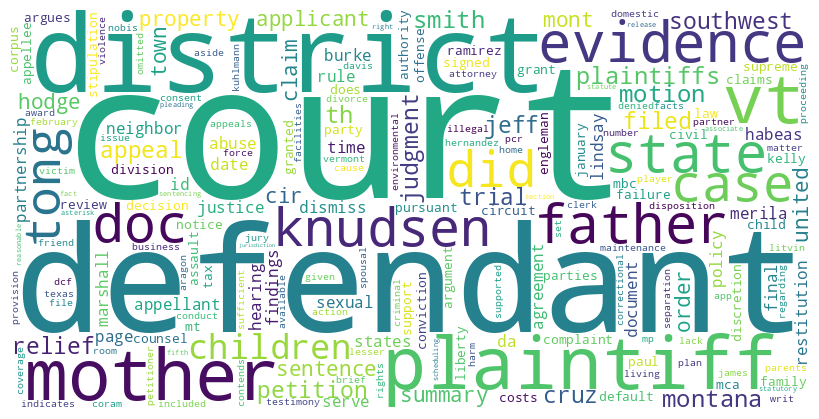

In [23]:
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(text):
    """
    Preprocess the text by removing non-alphabetic characters and converting to lowercase.
    """
    return re.sub("[^a-zA-Z]", " ", text.lower())

def main():
    file_path = 'output_washington_state_opinions_page1.txt'
    #file_path = 'processed_output.txt'
    # Read and parse the file.json
    with open(file_path, 'r') as file:
        data_json = json.load(file)

    # Extract plain text and preprocess
    texts = [preprocess_text(item['plain_text']) for item in data_json['results'] if 'plain_text' in item]

    # Calculate TF-IDF
    vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Aggregate TF-IDF scores over all documents
    summed_tfidf = np.sum(tfidf_matrix, axis=0)
    summed_tfidf_array = np.squeeze(np.asarray(summed_tfidf))

    # Create a dictionary of words and their summed TF-IDF scores
    tfidf_dict = dict(zip(vectorizer.get_feature_names_out(), summed_tfidf_array))

    # Generating a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_dict)

    # Plotting the WordCloud image
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

if __name__ == "__main__":
    main()


**AI generated**

In [40]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def process_text_file(file_path):
    # Reading the text file
    with open(file_path, 'r') as file:
        text_data = file.read()

    # Preprocessing the text
    processed_text = re.sub("[^a-zA-Z]", " ", text_data.lower())

    # Calculating TF-IDF for the single document
    vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([processed_text])

    # Retrieving feature names and scores
    feature_names = vectorizer.get_feature_names_out()
    dense = tfidf_matrix.todense()
    denselist = dense.tolist()

    # Creating a dictionary to store TF-IDF scores for words in the document
    tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

    return tfidf_scores

# Replace 'your_file_path.txt' with the path to your text file
file_path = 'processed_output.txt'
tfidf_scores = process_text_file(file_path)

# Printing the TF-IDF scores
print(tfidf_scores)


{'appeal': 0.1774343029731385, 'case': 0.17968548790128674, 'court': 0.812268452710942, 'defendant': 0.18418785775758323, 'district': 0.2005601117804795, 'evidence': 0.15635502591865952, 'id': 0.13609436156532537, 'motion': 0.13466178933832196, 'state': 0.24763034209630633, 'trial': 0.28262603507024714}


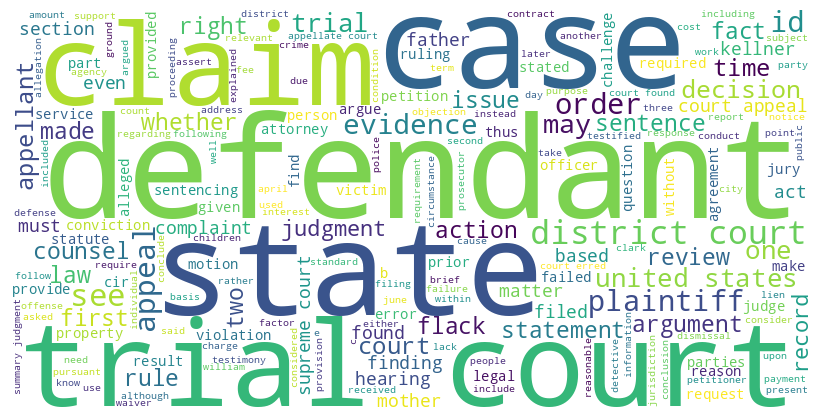

In [25]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# File path to your text file.json
file_path = 'processed_output.txt'

# Reading the text file.json
with open(file_path, 'r') as file:
    text_content = file.read()

# Preprocessing the text (lowercasing and removing special characters)
processed_text = re.sub("[^a-zA-Z]", " ", text_content.lower())

# Generating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

# Plotting the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Display the word cloud
plt.show()

*TFIDF scores: Popular choices of words in each page of opinions*

In [26]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_10
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page10.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.2}
print(tfidf_scores_example)

{'appeal': 0.4207088834180292, 'court': 0.5191726646435254, 'plaintiff': 0.7321086380549559}


In [27]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_9
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page9.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.2}
print(tfidf_scores_example)

{'court': 0.3598022319444816, 'defendant': 0.48086569366814574, 'did': 0.23986815462965438, 'district': 0.7627409828607525}


In [29]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_8
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page8.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.4}
print(tfidf_scores_example)

{'court': 0.8884087035207001}


In [31]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_7
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page7.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.7}
print(tfidf_scores_example)

{'court': 0.7744146634867293}


In [33]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_6
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page6.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.4}
print(tfidf_scores_example)

{'court': 0.8081614817828074, 'motion': 0.5671893194941391}


In [38]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_5
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page5.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the given document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.5}
print(tfidf_scores_example)

{'court': 0.752310290752983, 'district': 0.583049969237545}


In [46]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_3
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions_page3.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score > 0.4}
print(tfidf_scores_example)

{'court': 0.7921471988853767, 'trial': 0.4599569294204023}


In [51]:
# Tentative Word Popularity Choices
"""
The input file can be varied based on page number.
Current file: Opinions_page_2
"""
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import json

file_path = 'washington_state_opinions.json'

# Reading and parsing the file.json
with open(file_path, 'r') as file:
    data_json = json.load(file)

# Correcting the variable name for extracting texts
texts = [item['plain_text'] for item in data_json['results'] if 'plain_text' in item and item['plain_text']]

"""
Preprocessing the Text:
- Converting to lowercase
- Removing non-alphabetic characters (punctuation, numbers, etc.)
- Optionally, stopwords can be removed for more refined analysis
"""
processed_texts = [re.sub("[^a-zA-Z]", " ", text.lower()) for text in texts]

# Calculating TF-IDF
vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Retrieving feature names and scores
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()

# Creating a dictionary to store TF-IDF scores for words in the document
tfidf_scores = {feature_names[word_index]: denselist[0][word_index] for word_index in range(len(feature_names))}

# Displaying TF-IDF scores for the document
tfidf_scores_example = {word: score for word, score in tfidf_scores.items() if score >= 0.55}
print(tfidf_scores_example)

{'state': 0.5540601098351667, 'tex': 0.6624862596705176}
